<a href="https://colab.research.google.com/github/RautenM/PythonFundamentals/blob/main/Copy_of_Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Correlation coefficient between year and the rise in sea level.**


#  Study of the data and main descriptors 

https://datahub.io/core/sea-level-rise

Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015. This data contains "cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

In 2020, global sea level set a new record high—91.3 mm (3.6 inches) above 1993 levels.

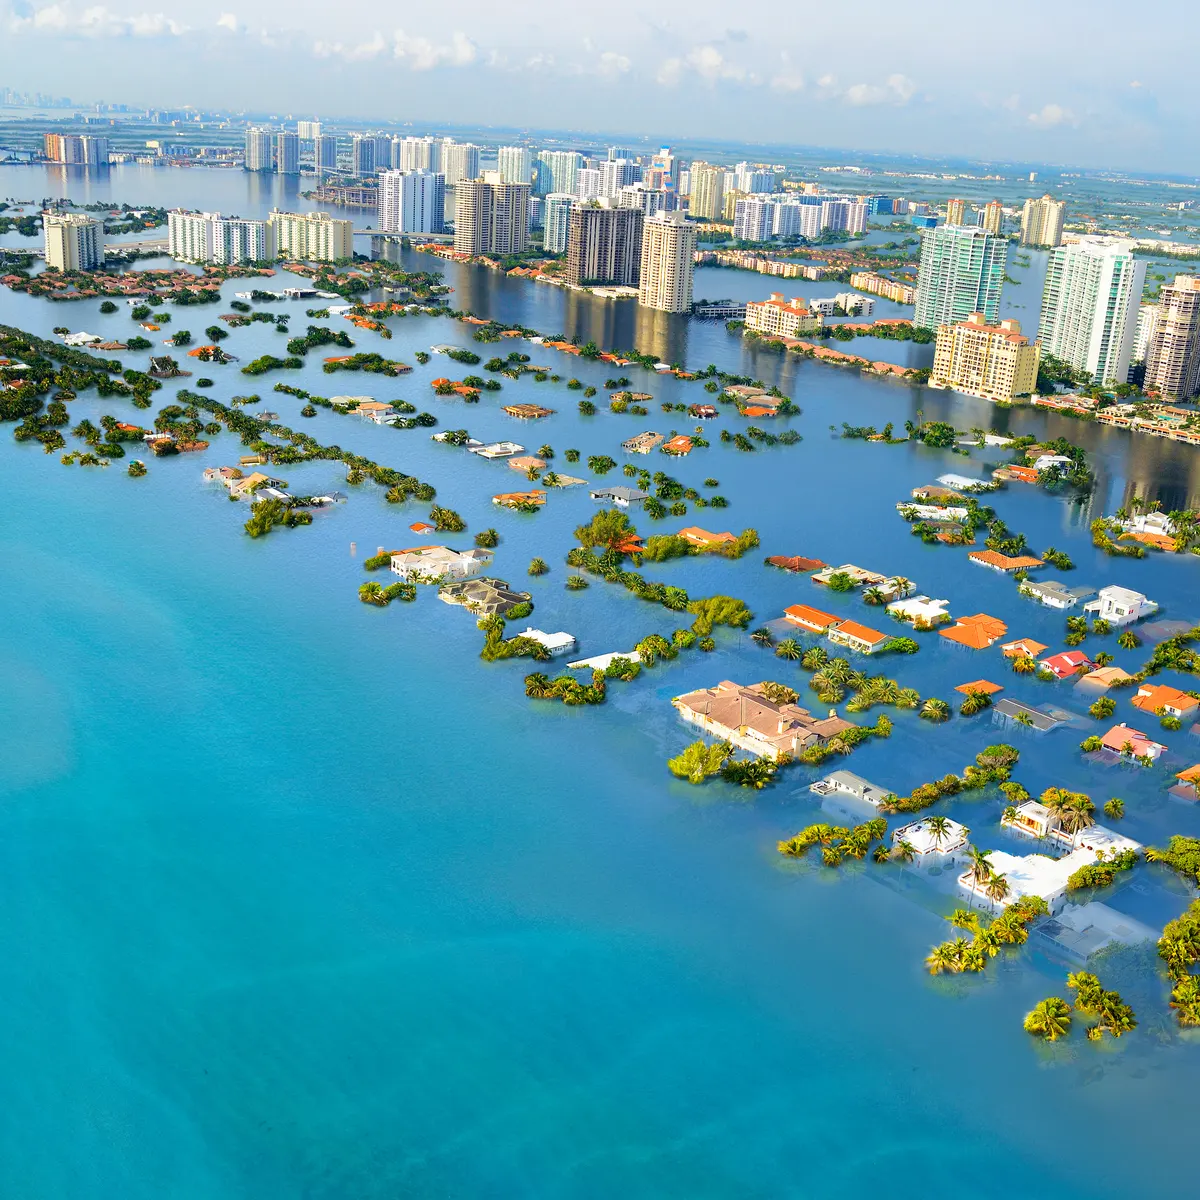Reading the data

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv



In [5]:
import pandas as pd
import numpy as np

url = ("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
sea_level = pd.read_csv(url)
sea_level


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [6]:
sea_level.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [7]:
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [8]:
sea_level.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


# Data findings

The data file contains 5 columns and 64 rows:

"Year" (rows) goes from 1880 to 2013.

In [9]:
def get_level():
  year = sea_level["Year"].to_numpy(np.int64)
  level =sea_level["CSIRO Adjusted Sea Level"].to_numpy(np.float64) 
  avg_level = level.mean()
  std = level.std()
  sum = level.sum()
  max = level.max()
  
  # highest sea level

  min = level.min() 
  
  # lowest sea level
  print("Mean",avg_level, "Std", std, "Total",sum, "Highest sea level",max, "Lowest sea level",min)

  #the year with the biggest rise in level

  higgest_sea_rise_year = np.where(level == max)[0][0]
  #the year with the lowest rise in level

  lowest_sea_rise_year = np.where(sea_level == min)[0][0]

###>>> add chart <<<###

  print(year[higgest_sea_rise_year])
  print(year[lowest_sea_rise_year])

  #Calculate correlation coefficien

  coeff =np. corrcoef(year,level)
  print(coeff)
  print(round(coeff[0][1],2))




get_level()


Mean 3.650340811880598 Std 2.476399631426498 Total 489.1456687920001 Highest sea level 9.326771644 Lowest sea level -0.440944881
2012
1882
[[1.         0.98475713]
 [0.98475713 1.        ]]
0.98



# Correlation coefficient between year and the rise in sea level

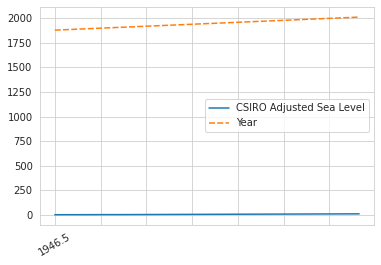

In [13]:
#@title Default title text { display-mode: "code" }
import pandas as pd
import seaborn as sns
import numpy as np

url = ("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv")
sea_level = pd.read_csv(url)

sea_level


level = sea_level[["CSIRO Adjusted Sea Level",'Year']]
data = level.mean()

data

chart = sns.lineplot(data=level)
chart.set_xticklabels(data, rotation=30)
sns.set_style("whitegrid")
chart

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 

## What caused you the most difficulty?

Your answer: 